<a href="https://colab.research.google.com/github/Akshitha-03/Stock-Price-Prediction/blob/main/STOCK_PRICE_PREDICTION_Review_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**IMPORT** **ALL** **NECESSARY** **LIBRARIES** 


In [ ]:
import pandas as pd
import numpy as np
import pandas_datareader as pdr
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from scipy.stats import norm
import warnings
warnings.filterwarnings("ignore") 

In [ ]:
key='6322cd72a9c28927a423b2e5e4b3775bc431eb73'

In [ ]:
df=pdr.get_data_tiingo('AAPL',api_key=key)

In [ ]:
df.to_csv('APPL.csv')

In [ ]:
df=pd.read_csv('/content/APPL.csv')
df2 = df.copy(deep=True)
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2016-12-12 00:00:00+00:00,113.30,115.00,112.490,113.29,26374377,26.658606,27.058603,26.468019,26.656253,105497508,0.0,1.0
1,AAPL,2016-12-13 00:00:00+00:00,115.19,115.92,113.750,113.84,43733811,27.103308,27.275071,26.764487,26.785664,174935244,0.0,1.0
2,AAPL,2016-12-14 00:00:00+00:00,115.19,116.20,114.980,115.04,34031834,27.103308,27.340953,27.053897,27.068014,136127336,0.0,1.0
3,AAPL,2016-12-15 00:00:00+00:00,115.82,116.73,115.230,115.38,46524544,27.251542,27.465658,27.112720,27.148014,186098176,0.0,1.0
4,AAPL,2016-12-16 00:00:00+00:00,115.97,116.50,115.645,116.47,44351134,27.286836,27.411541,27.210366,27.404482,177404536,0.0,1.0


In [ ]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,AAPL,2021-12-03 00:00:00+00:00,161.84,164.9600,159.72,164.020,118023116,161.84,164.9600,159.72,164.020,118023116,0.0,1.0
1254,AAPL,2021-12-06 00:00:00+00:00,165.32,167.8799,164.28,164.290,107496982,165.32,167.8799,164.28,164.290,107496982,0.0,1.0
1255,AAPL,2021-12-07 00:00:00+00:00,171.18,171.5800,168.34,169.080,120405352,171.18,171.5800,168.34,169.080,120405352,0.0,1.0
1256,AAPL,2021-12-08 00:00:00+00:00,175.08,175.9600,170.70,172.125,116998901,175.08,175.9600,170.70,172.125,116998901,0.0,1.0
1257,AAPL,2021-12-09 00:00:00+00:00,174.56,176.7500,173.92,174.910,108923739,174.56,176.7500,173.92,174.910,108923739,0.0,1.0


# **VISUALIZATION**

In [ ]:
import plotly.graph_objects as go
from datetime import datetime
import pandas_datareader.data as web
import plotly.express as px


**OHLC Plot**

In [ ]:

fig1 = go.Figure(data=go.Ohlc(x=df['date'],
                    open=df['open'],
                    high=df['high'],
                    low=df['low'],
                    close=df['close']))

fig1.update_layout(xaxis_rangeslider_visible=False)
fig1.show()

**CANDELSTICKS PLOT**

In [ ]:

fig2 = go.Figure(data=[go.Candlestick(x=df['date'],
                open=df['open'],
                high=df['high'],
                low=df['low'],
                close=df['close'])])
fig2.update_layout(xaxis_rangeslider_visible=False)
fig2.show()

**AREA CHART**

In [ ]:

fig3 = px.area(df, x="date", y="close",)
 
fig3.show()

**Time Series**

In [ ]:
fig4 = go.Figure([go.Scatter(x=df['date'], y=df['high'])])
fig4.show()

**Adj Close values with respect to a set of days**

closing price merely refers to the cost of shares at the end of the day, the adjusted closing price considers other factors like dividends, stock splits, and new stock offerings

<Figure size 1080x576 with 0 Axes>

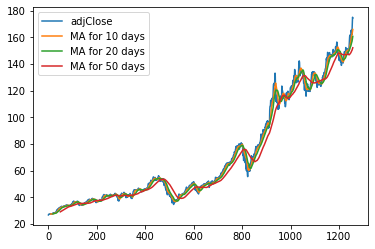

In [ ]:

ma_day = [10, 20, 50]

for ma in ma_day:
  
        column_name = f"MA for {ma} days"
        df[column_name] = df['adjClose'].rolling(ma).mean()

fig, axes = plt.subplots(nrows=0, ncols=0)
fig.set_figheight(8)
fig.set_figwidth(15)

df[['adjClose', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot()



**DAILY RETURNS**

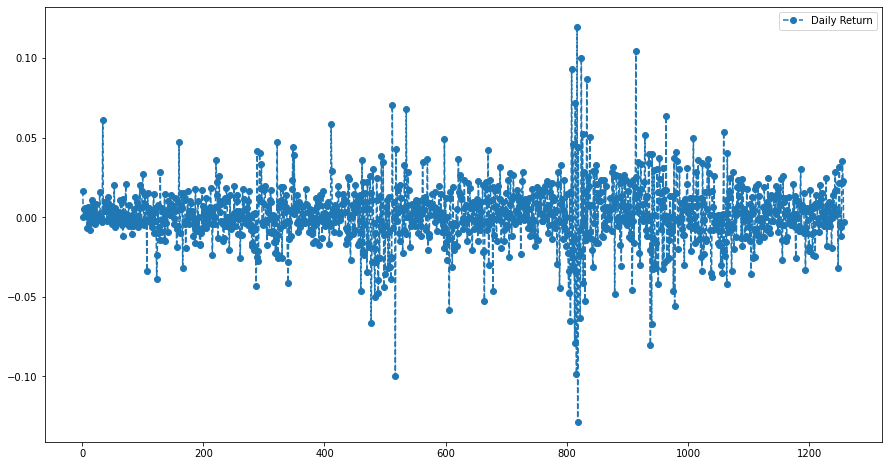

In [ ]:
# We'll use pct_change to find the percent change for each day

df['Daily Return'] = df['adjClose'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=0, ncols=0)
fig.set_figheight(8)
fig.set_figwidth(15)

df['Daily Return'].plot(legend=True, linestyle='--', marker='o')


**CLOSE PRICE HISTORY**

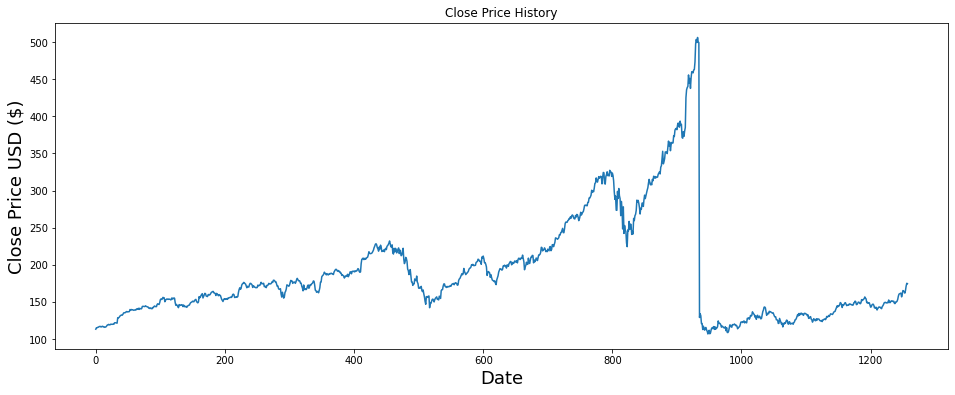

In [ ]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

SHAPE OF DATASET

In [ ]:
df.shape

(1258, 18)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   symbol          1258 non-null   object 
 1   date            1258 non-null   object 
 2   close           1258 non-null   float64
 3   high            1258 non-null   float64
 4   low             1258 non-null   float64
 5   open            1258 non-null   float64
 6   volume          1258 non-null   int64  
 7   adjClose        1258 non-null   float64
 8   adjHigh         1258 non-null   float64
 9   adjLow          1258 non-null   float64
 10  adjOpen         1258 non-null   float64
 11  adjVolume       1258 non-null   int64  
 12  divCash         1258 non-null   float64
 13  splitFactor     1258 non-null   float64
 14  MA for 10 days  1249 non-null   float64
 15  MA for 20 days  1239 non-null   float64
 16  MA for 50 days  1209 non-null   float64
 17  Daily Return    1257 non-null   f

In [ ]:
df.drop(['MA for 10 days','MA for 20 days','MA for 50 days','Daily Return'],inplace=True,axis=1)

In [ ]:
df.describe()

,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.000000,1258.000000
mean,189.182516,190.986761,187.124967,188.955938,4.960473e+07,71.808508,72.530536,71.007349,71.747317,1.205235e+08,0.009380,1.002385
std,70.020886,70.797409,68.902169,69.737207,3.892981e+07,39.882378,40.334635,39.378905,39.856084,5.591017e+07,0.079172,0.084583
min,106.840000,110.190000,103.100000,104.540000,1.136204e+07,26.658606,27.058603,26.468019,26.656253,4.099995e+07,0.000000,1.000000
25%,143.535000,144.482350,142.545000,143.600000,2.371339e+07,41.125537,41.535787,40.772895,41.224535,8.360832e+07,0.000000,1.000000
50%,170.700000,171.960000,169.255000,170.490000,3.342862e+07,51.635786,52.427206,51.291685,51.753382,1.054615e+08,0.000000,1.000000
75%,209.557500,211.997500,207.605000,209.870000,6.478320e+07,113.932409,115.090757,111.871193,113.622358,1.406886e+08,0.000000,1.000000
max,506.090000,515.140000,500.330000,514.790000,3.326072e+08,175.080000,176.750000,173.920000,174.910000,4.479402e+08,0.820000,4.000000


CHECK FOR NULL VALUES

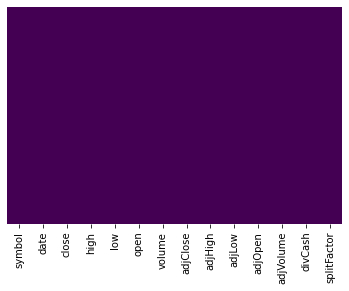

In [ ]:
sns.heatmap(df.isnull(),cbar=False,yticklabels=False,cmap='viridis')

In [ ]:
(df.isna().sum()/len(df))*100

symbol         0.0
date           0.0
close          0.0
high           0.0
low            0.0
open           0.0
volume         0.0
adjClose       0.0
adjHigh        0.0
adjLow         0.0
adjOpen        0.0
adjVolume      0.0
divCash        0.0
splitFactor    0.0
dtype: float64

# **Feature Engineering**





**HANDLING CATEGORICAL VALUES**

In [ ]:
df['symbol'].unique()

array(['AAPL'], dtype=object)

We observe that the Column Symbol contains only one value. i,e. AAPL so label encoding will not be be benifit. 
Hence we can remove the entire column.

In [ ]:
df.drop(['symbol'],inplace=True,axis=1)

In [ ]:
#label_encoder = preprocessing.LabelEncoder()
#df['symbol']= label_encoder.fit_transform(df['symbol'])
#df['symbol'].unique()

In [ ]:
df.shape

(1258, 13)

**Transformation of Date format**

In [ ]:
df['date'] = pd.to_datetime(df['date']).apply(lambda x: x.date())
df

,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,2016-12-12,113.30,115.0000,112.490,113.290,26374377,26.658606,27.058603,26.468019,26.656253,105497508,0.0,1.0
1,2016-12-13,115.19,115.9200,113.750,113.840,43733811,27.103308,27.275071,26.764487,26.785664,174935244,0.0,1.0
2,2016-12-14,115.19,116.2000,114.980,115.040,34031834,27.103308,27.340953,27.053897,27.068014,136127336,0.0,1.0
3,2016-12-15,115.82,116.7300,115.230,115.380,46524544,27.251542,27.465658,27.112720,27.148014,186098176,0.0,1.0
4,2016-12-16,115.97,116.5000,115.645,116.470,44351134,27.286836,27.411541,27.210366,27.404482,177404536,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,2021-12-03,161.84,164.9600,159.720,164.020,118023116,161.840000,164.960000,159.720000,164.020000,118023116,0.0,1.0
1254,2021-12-06,165.32,167.8799,164.280,164.290,107496982,165.320000,167.879900,164.280000,164.290000,107496982,0.0,1.0
1255,2021-12-07,171.18,171.5800,168.340,169.080,120405352,171.180000,171.580000,168.340000,169.080000,120405352,0.0,1.0
1256,2021-12-08,175.08,175.9600,170.700,172.125,116998901,175.080000,175.960000,170.700000,172.125000,116998901,0.0,1.0


In [ ]:
print(f'Dataframe contains stock prices between {df.date.min()} {df.date.max()}')
print(f'Total days={(df.date.max()-df.date.min()).days} days')

Dataframe contains stock prices between 2016-12-12 2021-12-09
Total days=1823 days


**DROP DUPLICATE VALUES IF PRESENT**

In [ ]:
df.drop_duplicates()

,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,2016-12-12,113.30,115.0000,112.490,113.290,26374377,26.658606,27.058603,26.468019,26.656253,105497508,0.0,1.0
1,2016-12-13,115.19,115.9200,113.750,113.840,43733811,27.103308,27.275071,26.764487,26.785664,174935244,0.0,1.0
2,2016-12-14,115.19,116.2000,114.980,115.040,34031834,27.103308,27.340953,27.053897,27.068014,136127336,0.0,1.0
3,2016-12-15,115.82,116.7300,115.230,115.380,46524544,27.251542,27.465658,27.112720,27.148014,186098176,0.0,1.0
4,2016-12-16,115.97,116.5000,115.645,116.470,44351134,27.286836,27.411541,27.210366,27.404482,177404536,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,2021-12-03,161.84,164.9600,159.720,164.020,118023116,161.840000,164.960000,159.720000,164.020000,118023116,0.0,1.0
1254,2021-12-06,165.32,167.8799,164.280,164.290,107496982,165.320000,167.879900,164.280000,164.290000,107496982,0.0,1.0
1255,2021-12-07,171.18,171.5800,168.340,169.080,120405352,171.180000,171.580000,168.340000,169.080000,120405352,0.0,1.0
1256,2021-12-08,175.08,175.9600,170.700,172.125,116998901,175.080000,175.960000,170.700000,172.125000,116998901,0.0,1.0


**CORRELATION**

In [ ]:
c_df = df

In [ ]:
c_df = c_df.drop(['adjClose'], axis = 1)

In [ ]:
c_df.shape

(1258, 12)

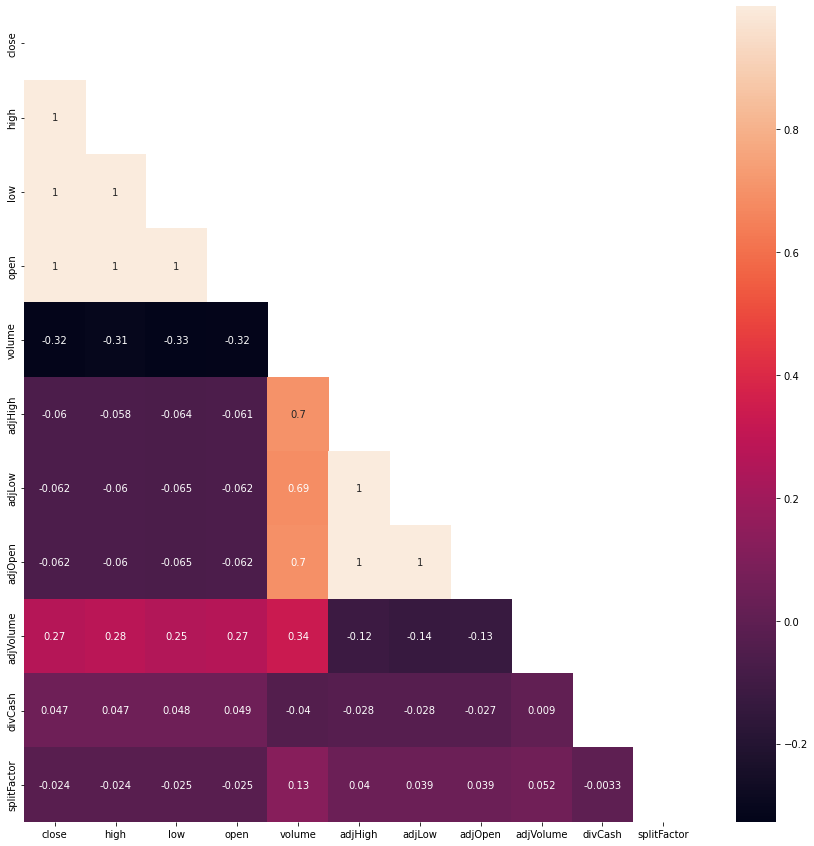

In [ ]:
corr=c_df.corr()
plt.figure(figsize=(15,15))
mask = np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr,mask=mask,annot=True)
plt.show()

In [ ]:
c_df.corr().style.background_gradient(cmap="coolwarm")

,close,high,low,open,volume,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
close,1.000000,0.999514,0.999521,0.999089,-0.318448,-0.060187,-0.061770,-0.062098,0.265307,0.047398,-0.024236
high,0.999514,1.000000,0.999304,0.999561,-0.309147,-0.057660,-0.059632,-0.059562,0.279765,0.047182,-0.023908
low,0.999521,0.999304,1.000000,0.999520,-0.327152,-0.063714,-0.064914,-0.065277,0.253716,0.047837,-0.025032
open,0.999089,0.999561,0.999520,1.000000,-0.316871,-0.060564,-0.062196,-0.061990,0.267884,0.049132,-0.024834
volume,-0.318448,-0.309147,-0.327152,-0.316871,1.000000,0.701477,0.688644,0.697089,0.336256,-0.040069,0.126045
adjHigh,-0.060187,-0.057660,-0.063714,-0.060564,0.701477,1.000000,0.999675,0.999808,-0.118647,-0.028314,0.040185
adjLow,-0.061770,-0.059632,-0.064914,-0.062196,0.688644,0.999675,1.000000,0.999739,-0.135245,-0.027941,0.038697
adjOpen,-0.062098,-0.059562,-0.065277,-0.061990,0.697089,0.999808,0.999739,1.000000,-0.125867,-0.027373,0.038819
adjVolume,0.265307,0.279765,0.253716,0.267884,0.336256,-0.118647,-0.135245,-0.125867,1.000000,0.009025,0.051973
divCash,0.047398,0.047182,0.047837,0.049132,-0.040069,-0.028314,-0.027941,-0.027373,0.009025,1.000000,-0.003343


**The following are the column pairs with higher correlation than the threshold: ( Threshold : 0.9)**


*   close -> open
*   close -> low
*   close -> high
*   low -> high
*   open -> high
*   open -> low
*   adjhigh -> adjopen
*   adjhigh -> adjlow
*   adjopen -> adjlow
*   close -> volume
*   high -> volume
*   low -> volume
*   open -> volume



**We remove the following columns**

* open
* low
* volume
* adjlow
* adjopen

**REMOVE UNNECESSARY COLUMNS**





In [ ]:
df.drop(['adjLow','adjOpen','low','open','volume'],inplace=True,axis=1)

In [ ]:
df.shape

(1258, 8)

In [ ]:
df

,date,close,high,adjClose,adjHigh,adjVolume,divCash,splitFactor
0,2016-12-12,113.30,115.0000,26.658606,27.058603,105497508,0.0,1.0
1,2016-12-13,115.19,115.9200,27.103308,27.275071,174935244,0.0,1.0
2,2016-12-14,115.19,116.2000,27.103308,27.340953,136127336,0.0,1.0
3,2016-12-15,115.82,116.7300,27.251542,27.465658,186098176,0.0,1.0
4,2016-12-16,115.97,116.5000,27.286836,27.411541,177404536,0.0,1.0
...,...,...,...,...,...,...,...,...
1253,2021-12-03,161.84,164.9600,161.840000,164.960000,118023116,0.0,1.0
1254,2021-12-06,165.32,167.8799,165.320000,167.879900,107496982,0.0,1.0
1255,2021-12-07,171.18,171.5800,171.180000,171.580000,120405352,0.0,1.0
1256,2021-12-08,175.08,175.9600,175.080000,175.960000,116998901,0.0,1.0


**CONVERTING TO INT DATATYPES**

In [ ]:
df.dtypes

date            object
close          float64
high           float64
adjClose       float64
adjHigh        float64
adjVolume        int64
divCash        float64
splitFactor    float64
dtype: object

In [ ]:
df.drop(['date'],inplace = True,axis=1)

**FEATURE SCALING**

**NORMALIZATION**

In [ ]:
temp = df

In [ ]:
names = temp.columns

scaler = preprocessing.MinMaxScaler()
nn_ds = scaler.fit_transform(temp)
nn_ds = pd.DataFrame(nn_ds, columns=names)

In [ ]:
nn_ds

,close,high,adjClose,adjHigh,adjVolume,divCash,splitFactor
0,0.016180,0.011878,0.000000,0.000000,0.158494,0.0,0.0
1,0.020914,0.014150,0.002996,0.001446,0.329128,0.0,0.0
2,0.020914,0.014841,0.002996,0.001886,0.233763,0.0,0.0
3,0.022492,0.016150,0.003995,0.002719,0.356559,0.0,0.0
4,0.022868,0.015582,0.004233,0.002358,0.335196,0.0,0.0
...,...,...,...,...,...,...,...
1253,0.137758,0.135251,0.910795,0.921238,0.189274,0.0,0.0
1254,0.146475,0.142462,0.934241,0.940744,0.163407,0.0,0.0
1255,0.161152,0.151599,0.973723,0.965462,0.195128,0.0,0.0
1256,0.170920,0.162415,1.000000,0.994722,0.186757,0.0,0.0


**STANDARDIZATION**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
names = nn_ds.columns
ns_ds = StandardScaler().fit_transform(nn_ds) 
ns_ds = pd.DataFrame(data=ns_ds, columns=names)

In [ ]:
ns_ds

,close,high,adjClose,adjHigh,adjVolume,divCash,splitFactor
0,-1.084144,-1.073725,-1.132527,-1.127815,-0.268859,-0.118523,-0.028205
1,-1.057141,-1.060725,-1.121372,-1.122446,0.973587,-0.118523,-0.028205
2,-1.057141,-1.056769,-1.121372,-1.120812,0.279199,-0.118523,-0.028205
3,-1.048140,-1.049280,-1.117654,-1.117719,1.173324,-0.118523,-0.028205
4,-1.045997,-1.052530,-1.116768,-1.119062,1.017770,-0.118523,-0.028205
...,...,...,...,...,...,...,...
1253,-0.390646,-0.367769,2.258323,2.292477,-0.044739,-0.118523,-0.028205
1254,-0.340927,-0.326510,2.345614,2.364898,-0.233082,-0.118523,-0.028205
1255,-0.257204,-0.274226,2.492605,2.456669,-0.002114,-0.118523,-0.028205
1256,-0.201485,-0.212335,2.590431,2.565304,-0.063065,-0.118523,-0.028205


**SKEWNESS - OUTLIERS - KURTOSIS**

In [ ]:
skew_features = ns_ds.apply(lambda x :x.skew()).sort_values(ascending=True)
skew_features

adjHigh         0.831324
adjClose        0.836918
close           1.750956
high            1.753074
adjVolume       2.010981
divCash         8.825747
splitFactor    35.468296
dtype: float64

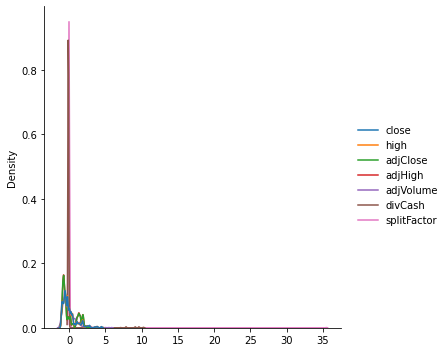

In [ ]:
sns.displot(ns_ds, kind="kde", bw_adjust=.25)

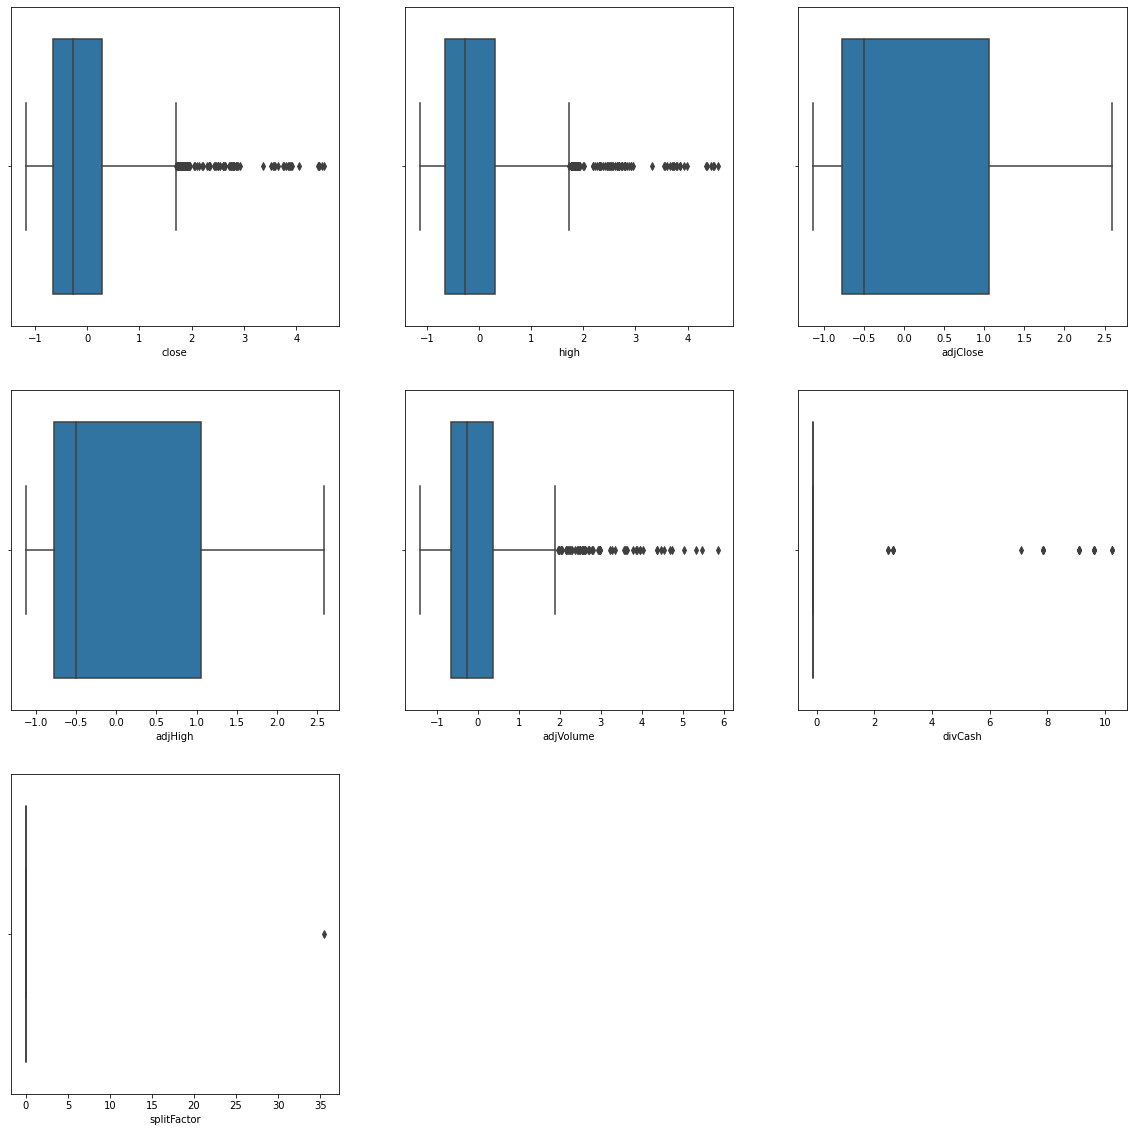

In [ ]:
plt.figure(figsize=(20,20))
plt.subplot(3,3,1)
sns.boxplot(ns_ds['close'])
plt.subplot(3,3,2)
sns.boxplot(ns_ds['high'])
plt.subplot(3,3,3)
sns.boxplot(ns_ds['adjClose'])
plt.subplot(3,3,4)
sns.boxplot(ns_ds['adjHigh'])
plt.subplot(3,3,5)
sns.boxplot(ns_ds['adjVolume'])
plt.subplot(3,3,6)
sns.boxplot(ns_ds['divCash'])
plt.subplot(3,3,7)
sns.boxplot(ns_ds['splitFactor'])


***Removing skewness using log function***

In [ ]:
out_cols_log = np.log(ns_ds)

In [ ]:
out_cols_log

,close,high,adjClose,adjHigh,adjVolume,divCash,splitFactor
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,-0.026768,NaN,NaN
2,NaN,NaN,NaN,NaN,-1.275831,NaN,NaN
3,NaN,NaN,NaN,NaN,0.159841,NaN,NaN
4,NaN,NaN,NaN,NaN,0.017614,NaN,NaN
...,...,...,...,...,...,...,...
1253,NaN,NaN,0.814623,0.829633,NaN,NaN,NaN
1254,NaN,NaN,0.852547,0.860735,NaN,NaN,NaN
1255,NaN,NaN,0.913328,0.898806,NaN,NaN,NaN
1256,NaN,NaN,0.951824,0.942077,NaN,NaN,NaN


In [ ]:
out_cols_log.skew()

close         -0.769806
high          -0.940003
adjClose      -2.755586
adjHigh       -1.847113
adjVolume     -1.257443
divCash       -1.144226
splitFactor         NaN
dtype: float64

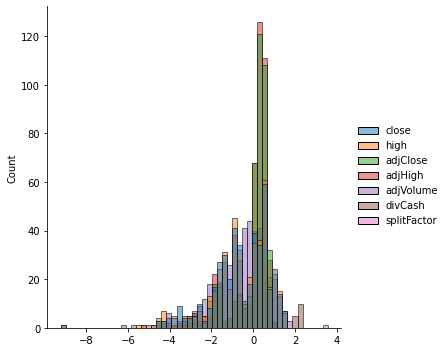

In [ ]:
sns.displot(out_cols_log)

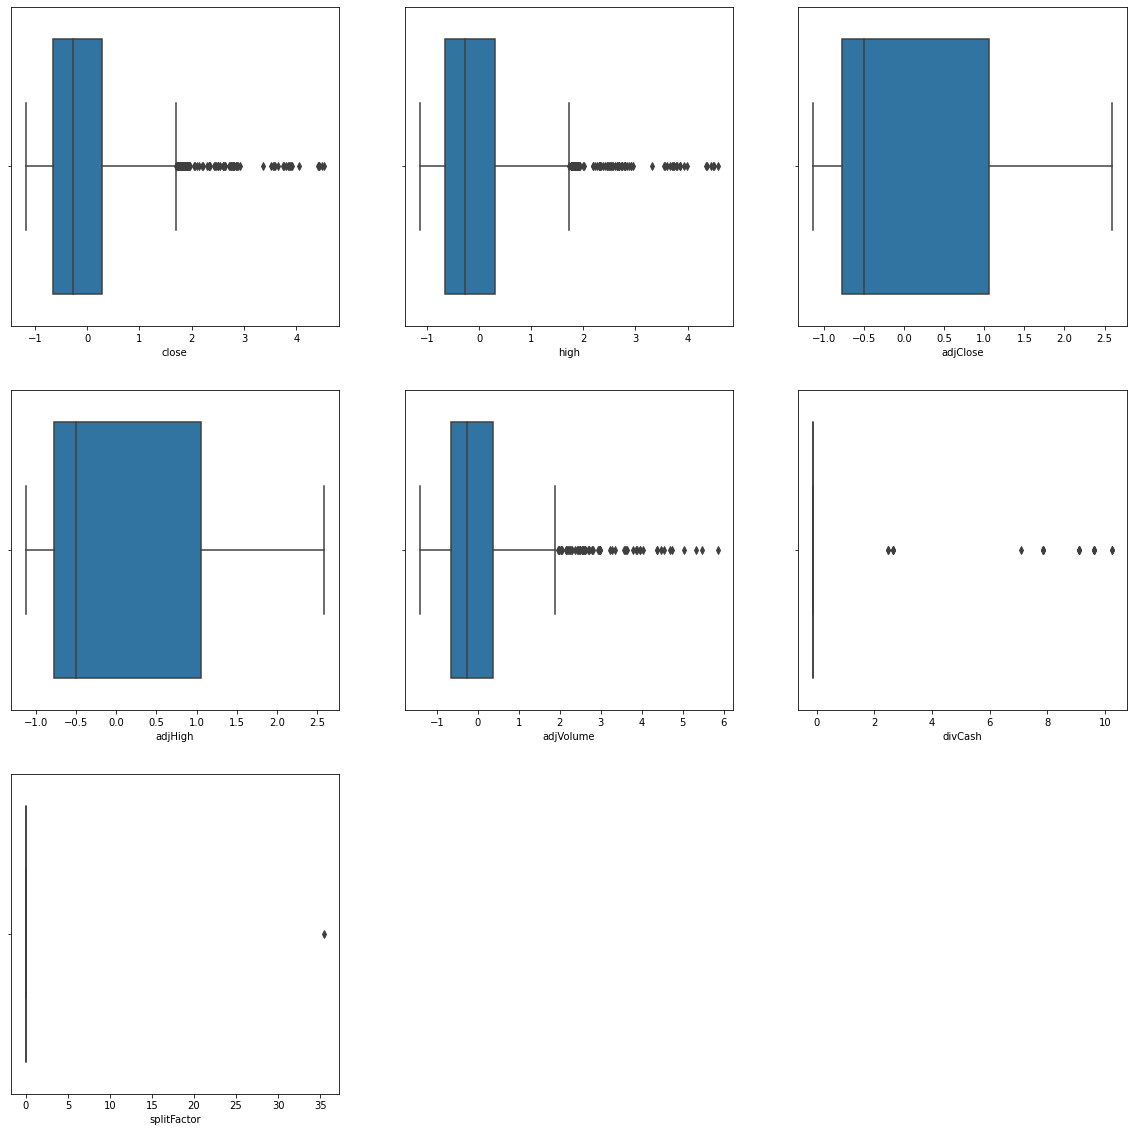

In [ ]:
plt.figure(figsize=(20,20))
plt.subplot(3,3,1)
sns.boxplot(ns_ds['close'])
plt.subplot(3,3,2)
sns.boxplot(ns_ds['high'])
plt.subplot(3,3,3)
sns.boxplot(ns_ds['adjClose'])
plt.subplot(3,3,4)
sns.boxplot(ns_ds['adjHigh'])
plt.subplot(3,3,5)
sns.boxplot(ns_ds['adjVolume'])
plt.subplot(3,3,6)
sns.boxplot(ns_ds['divCash'])
plt.subplot(3,3,7)
sns.boxplot(ns_ds['splitFactor'])

***Remving skewness using IQR***

In [ ]:
Q1 = ns_ds.quantile(0.25)
Q3 = ns_ds.quantile(0.75)

IQR = Q3 - Q1

t = ns_ds[~((ns_ds< (Q1 - 1.5 * IQR)) |(ns_ds > (Q3 + 1.5 * IQR))).any(axis=1)]

In [ ]:
t.skew()

close          0.975247
high           0.977245
adjClose       0.900141
adjHigh        0.896670
adjVolume      0.826192
divCash        0.000000
splitFactor    0.000000
dtype: float64

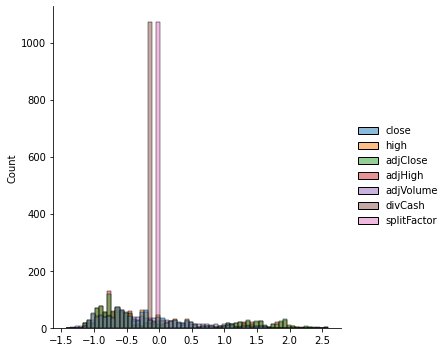

In [ ]:
sns.displot(t)

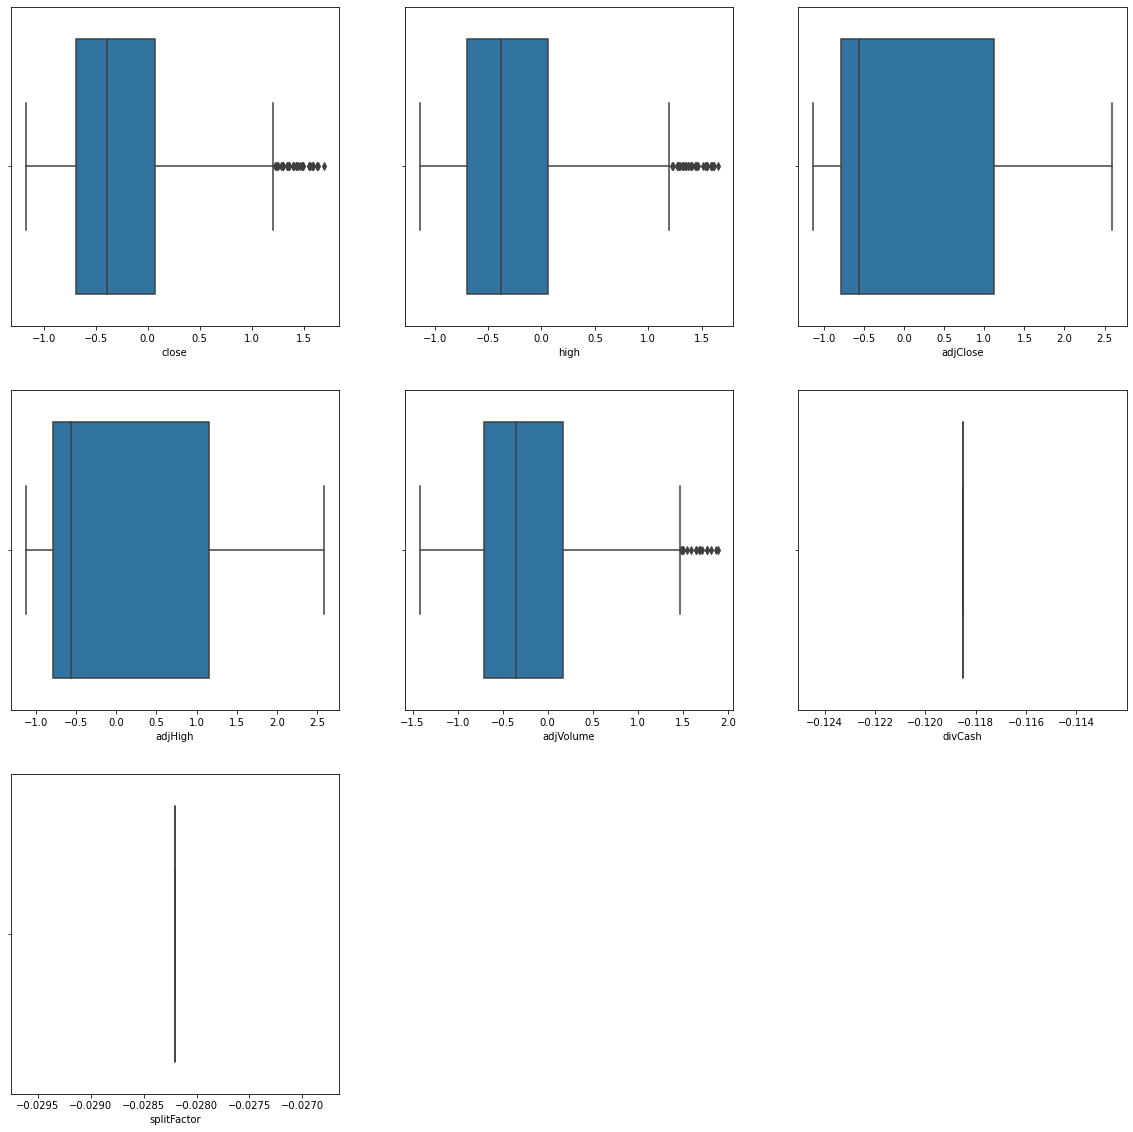

In [ ]:
plt.figure(figsize=(20,20))
plt.subplot(3,3,1)
sns.boxplot(t['close'])
plt.subplot(3,3,2)
sns.boxplot(t['high'])
plt.subplot(3,3,3)
sns.boxplot(t['adjClose'])
plt.subplot(3,3,4)
sns.boxplot(t['adjHigh'])
plt.subplot(3,3,5)
sns.boxplot(t['adjVolume'])
plt.subplot(3,3,6)
sns.boxplot(t['divCash'])
plt.subplot(3,3,7)
sns.boxplot(t['splitFactor'])


***HENCE WE OBSERVE THAT ALMOST ALL THE OUTLIERS OF THE DATA HAVE BEEN REMOVED***

***We observe that compared to Log method IQR method is more efficient***

In [ ]:
t

,close,high,adjClose,adjHigh,adjVolume,divCash,splitFactor
0,-1.084144,-1.073725,-1.132527,-1.127815,-0.268859,-0.118523,-0.028205
1,-1.057141,-1.060725,-1.121372,-1.122446,0.973587,-0.118523,-0.028205
2,-1.057141,-1.056769,-1.121372,-1.120812,0.279199,-0.118523,-0.028205
3,-1.048140,-1.049280,-1.117654,-1.117719,1.173324,-0.118523,-0.028205
4,-1.045997,-1.052530,-1.116768,-1.119062,1.017770,-0.118523,-0.028205
...,...,...,...,...,...,...,...
1253,-0.390646,-0.367769,2.258323,2.292477,-0.044739,-0.118523,-0.028205
1254,-0.340927,-0.326510,2.345614,2.364898,-0.233082,-0.118523,-0.028205
1255,-0.257204,-0.274226,2.492605,2.456669,-0.002114,-0.118523,-0.028205
1256,-0.201485,-0.212335,2.590431,2.565304,-0.063065,-0.118523,-0.028205


#**EDA**

---



In [ ]:
 import random
df['close'].sample(5).mean()


163.06

In [ ]:
df['close'].sample(5).median()


199.25

In [ ]:
df['close'].sample(5).mode()

0    148.48
1    164.22
2    172.99
3    262.64
4    282.97
dtype: float64

In [ ]:
df_mean=df['close'].mean()
df_mean

189.18251589666122

In [ ]:
df_median=df['close'].median()
df_median

170.7

In [ ]:
df_mode=df['close'].mode()
df_mode

0    172.5
dtype: float64

In [ ]:
df.shape


(1258, 7)

In [ ]:
sum=0
i=int(0)
for i in range(0,1257):
 sum=sum+pow((df['close'].loc[i]- df_mean),2)
sum=sum/df.shape[0] 
sum
stddev=pow(sum,0.5)
stddev


69.9918359332008

In [ ]:
df_close=df[['close','open']].agg([np.mean, np.std])
df_close.transpose()

KeyError: ignored

In [ ]:

df_close.transpose().plot(kind = "barh", y = "mean", legend = False,
            title = "Open and Close means")

In [ ]:
df_close.transpose().plot(kind = "barh", y = "mean", legend = False,
            title = "Open and Close Standard deviations",xerr = "std")

In [ ]:
variance=pow(stddev,2)
variance

Sampling

In [ ]:
samplemeans=[]
for i in range(100):
  samples= df['close'].sample(n=10)
  samplemean=np.mean(samples)
  samplemeans.append(samplemean)

samplemeans
np.mean(samplemeans)


In [ ]:
samples.plot(kind = "bar", x = "samplemeans", legend = True,
            title = "sample means")

In [ ]:
df['close'].corr(df['open'])

In [ ]:
n=int(input())
def systematic_sampling(df, step):
 
    indexes = np.arange(0, len(df), step=step)
    systematic_sample = df.iloc[indexes]
    return systematic_sample
systematic_sample = systematic_sampling(df, n)
display(systematic_sample)

In [ ]:
systematic_data = round(systematic_sample['close'].mean())
print("Systematic sampling mean (for close)", systematic_data)

In [ ]:
systematic_data = round(systematic_sample['open'].mean())
print("Systematic sampling mean(for open) ", systematic_data)

# KURTOSIS

In [ ]:
normal = stats.norm.pdf(x_axis, mean_val,std_val)
#plt.plot(x_axis, normal);
plt.plot(x_axis,stats.laplace.pdf(x_axis, mean_val,std_val), label='Leptokurtic')
print('Excess kurtosis of leptokurtic distribution:', (stats.laplace.stats(moments='k')))
plt.plot(x_axis, normal, label='Mesokurtic (normal)')
print('Excess kurtosis of mesokurtic distribution:', (stats.norm.stats(moments='k')))
plt.plot(x_axis,stats.cosine.pdf(x_axis,mean_val,std_val), label='Platykurtic')
print('Excess kurtosis of platykurtic distribution:', (stats.cosine.stats(moments='k')))
plt.legend();

# Target Prediction (Close Value)

In [ ]:
target=150

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
sns.distplot(np.mean(close,axis=1), 
             kde=False, label='Close')
ax.set_xlabel("Close Value",fontsize=16)
ax.set_ylabel("Frequency",fontsize=16)
plt.axvline(target, color='red')
plt.legend()
plt.tight_layout()

In [ ]:
df2

,close,S_3,S_9
9,116.52,116.766667,115.823333
10,117.26,116.623333,116.181111
11,116.76,116.690000,116.411111
12,116.73,116.846667,116.585556
13,115.82,116.916667,116.686667
...,...,...,...
1253,161.84,164.610000,161.755556
1254,165.32,163.456667,161.898889
1255,171.18,163.640000,162.376667
1256,175.08,166.113333,163.462222


In [ ]:
# importing libraries
import pandas as pd
import numpy as np

# reading the data

# looking at the first five rows of the data
print(df.head())
print('\n Shape of the data:')
print(df.shape)
df

# setting the index as date
df['date'] = pd.to_datetime(df.date,format='%Y-%m-%d')
df.index = df['date']

#creating dataframe with date and the target variable
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['date', 'close'])

for i in range(0,len(data)):
     new_data['date'][i] = data['date'][i]
     new_data['close'][i] = data['close'][i]

# NOTE: While splitting the data into train and validation set, we cannot use random splitting since that will destroy the time component. So here we have set the last year’s data into validation and the 4 years’ data before that into train set.

# splitting into train and validation
train = new_data[:987]
valid = new_data[987:]

# shapes of training set
print('\n Shape of training set:')
print(train.shape)

# shapes of validation set
print('\n Shape of validation set:')
print(valid.shape)

# In the next step, we will create predictions for the validation set and check the RMSE using the actual values.
# making predictions
preds = []
Sum=0
for i in range(0,valid.shape[0]):
    a = train['close'][len(train)-248+i:].sum() + Sum
    b = a/248
    Sum+=b
    preds.append(b)

# checking the results (RMSE value)
rms=np.sqrt(np.mean(np.power((np.array(valid['close'])-preds),2)))
print('\n RMSE value on validation set:')
print(rms)

                          symbol  ... splitFactor
date                              ...            
2016-12-12 00:00:00+00:00   AAPL  ...         1.0
2016-12-13 00:00:00+00:00   AAPL  ...         1.0
2016-12-14 00:00:00+00:00   AAPL  ...         1.0
2016-12-15 00:00:00+00:00   AAPL  ...         1.0
2016-12-16 00:00:00+00:00   AAPL  ...         1.0

[5 rows x 14 columns]

 Shape of the data:
(1258, 14)

 Shape of training set:
(987, 2)

 Shape of validation set:
(271, 2)

 RMSE value on validation set:
134.48395531248343


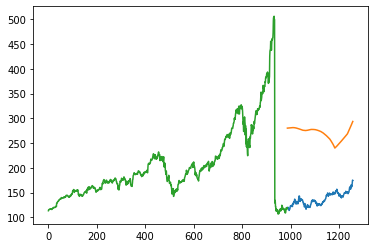

In [ ]:
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.plot(valid[['close', 'Predictions']])
plt.plot(train['close'])

In [ ]:
#importing required libraries
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

#creating dataframe
data = df2.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df2)),columns=['date', 'close'])
for i in range(0,len(data)):
    new_data['date'][i] = data['date'][i]
    new_data['close'][i] = data['close'][i]

#setting index
new_data.index = new_data.date
new_data.drop('date', axis=1, inplace=True)

#creating train and test sets
dataset = new_data.values

train = dataset[0:987,:]
valid = dataset[987:,:]

#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

#predicting 246 values, using past 60 from the train data
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

927/927 - 25s - loss: 0.0078 - 25s/epoch - 27ms/step


In [ ]:
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
rms

8.423566453128018

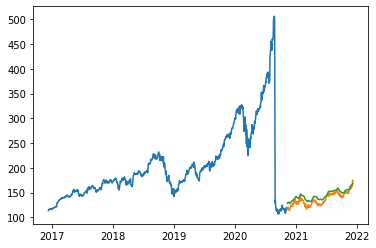

In [ ]:
#for plotting
train = new_data[:987]
valid = new_data[987:]
valid['Predictions'] = closing_price
plt.plot(train['close'])
plt.plot(valid[['close','Predictions']])

In [ ]:
from sklearn.linear_model import LinearRegression 
# pandas and numpy are used for data manipulation 
import pandas as pd 
import numpy as np 
# matplotlib and seaborn are used for plotting graphs 
import matplotlib.pyplot as plt 
import seaborn 
# fix_yahoo_finance is used to fetch data 
import fix_yahoo_finance as yf

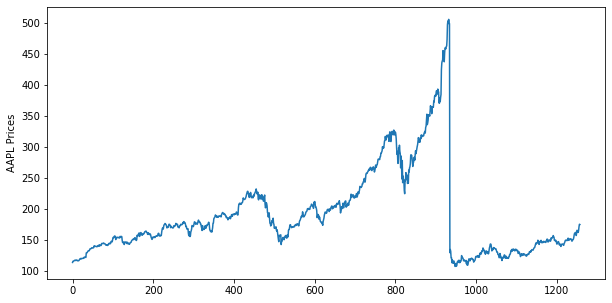

In [ ]:
#Df = yf.download('AAPL','2008-01-01','2020-12-31')
# Only keep close columns 
df2=df2[['close']] 
# Drop rows with missing values 
df2= df2.dropna() 
# Plot the closing price of GLD 
df2.close.plot(figsize=(10,5)) 
plt.ylabel("AAPL Prices")
plt.show()

In [ ]:
df2['S_3'] = df2['close'].shift(1).rolling(window=3).mean() #Moving Avg
df2['S_9']= df2['close'].shift(1).rolling(window=9).mean() 
df2= df2.dropna() 
X = df2[['S_3','S_9']] 
X.head()
y = df2['close']
y.head()

9     116.52
10    117.26
11    116.76
12    116.73
13    115.82
Name: close, dtype: float64

In [ ]:
t=.7 
t = int(t*len(df2)) 
# Train dataset 
X_train = X[:t] 
y_train = y[:t]  
# Test dataset 
X_test = X[t:] 
y_test = y[t:]

In [ ]:
linear = LinearRegression().fit(X_train,y_train)

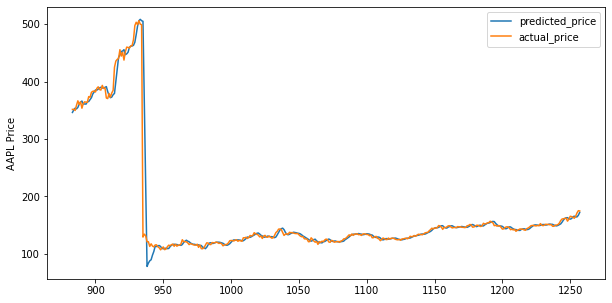

In [ ]:
predicted_price = linear.predict(X_test)  
predicted_price = pd.DataFrame(predicted_price,index=y_test.index,columns = ['price'])  
predicted_price.plot(figsize=(10,5))  
y_test.plot()  
plt.legend(['predicted_price','actual_price'])  
plt.ylabel("AAPL Price")  
plt.show()

In [ ]:
r2_score = linear.score(X[t:],y[t:])
print("Accuracy :",float("{0:.2f}".format(r2_score*100)))
#print(linear.score(X_test,y_test))

Accuracy : 94.06
0.9406193348110102


ValueError: ignored